In [1]:
import numpy as np
from collections import Counter
from qiskit import IBMQ,Aer,schedule, execute, QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import timeline_drawer
from qiskit.visualization.pulse_v2 import draw, IQXDebugging
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer import AerSimulator
import qiskit.quantum_info as qi
from qiskit.providers.aer.noise import QuantumError, ReadoutError

# Tomography functions
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import StateTomography

from qiskit import Aer

In [2]:
IBMQ.load_account()

<ipython-input-2-beb09c0bf764>:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
provider = IBMQ.get_provider(hub="ibm-q-ncsu", group="lehigh-universit", project="qc-error-model") # ibm-q-ncsu/lehigh-universit/qc-error-model
name = "ibm_nairobi"
backend = provider.get_backend(name)
backend_noise_model = NoiseModel.from_backend(backend)

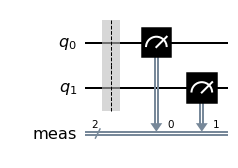

In [4]:
def single_iter(n_qubits=2):
    iterate = QuantumCircuit(n_qubits)
    return iterate

def iterative_circ(num_itrs, n_qubits=2, save_den = True):   
    total_circ = QuantumCircuit(n_qubits)
    for i in range(num_itrs):
        total_circ.compose(single_iter(n_qubits), inplace=True)
    if save_den:
        total_circ.save_density_matrix(pershot=False)
    total_circ.measure_all()
    return total_circ

n_qubits = 2
temp_circ2 = iterative_circ(1, n_qubits, save_den = False)
temp_circ3 = transpile(temp_circ2, backend=backend)
temp_sch = schedule(temp_circ3, backend)

temp_circ2.draw('mpl')

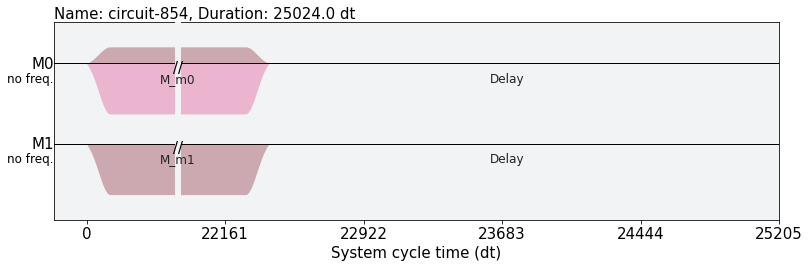

In [5]:
temp_sch.draw()

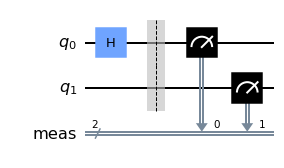

In [6]:
def single_iter(n_qubits=2):
    iterate = QuantumCircuit(n_qubits)
    iterate.h(0)
#     iterate.cx(0,1)
#     iterate.cx(1,2)
#     iterate.barrier()
#     iterate.cx(1,2)
#     iterate.cx(0,1)
#     iterate.h(0)
#     iterate.barrier()
    return iterate

def iterative_circ(num_itrs, n_qubits=2, save_den = True):   
    total_circ = QuantumCircuit(n_qubits)
    for i in range(num_itrs):
        total_circ.compose(single_iter(n_qubits), inplace=True)
    if save_den:
        total_circ.save_density_matrix(pershot=False)
    total_circ.measure_all()
    return total_circ

n_qubits = 2
temp_circ2 = iterative_circ(1, n_qubits, save_den = False)
temp_circ3 = transpile(temp_circ2, backend=backend)
temp_sch = schedule(temp_circ3, backend)

temp_circ2.draw('mpl')

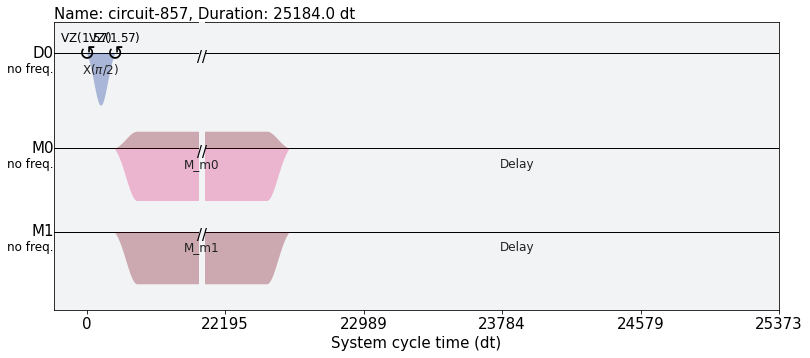

In [7]:
temp_sch.draw()

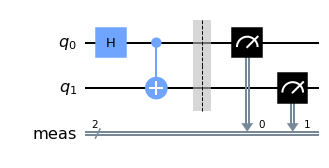

In [8]:
# CCX
def single_iter(n_qubits=2):
    iterate = QuantumCircuit(n_qubits)
    iterate.h(0)
    iterate.cx(0,1)
#     iterate.cx(1,2)
#     iterate.ccx(0,1,2)
#     iterate.barrier()
    return iterate

def iterative_circ(num_itrs, n_qubits=2, save_den = True):   
    total_circ = QuantumCircuit(n_qubits)
    for i in range(num_itrs):
        total_circ.compose(single_iter(n_qubits), inplace=True)
    if save_den:
        total_circ.save_density_matrix(pershot=False)
    total_circ.measure_all()
    return total_circ

n_qubits = 2
temp_circ4 = iterative_circ(1, n_qubits, save_den = False)
temp_circ5 = transpile(temp_circ4, backend=backend)
temp_sch2 = schedule(temp_circ5, backend)

temp_circ4.draw('mpl')

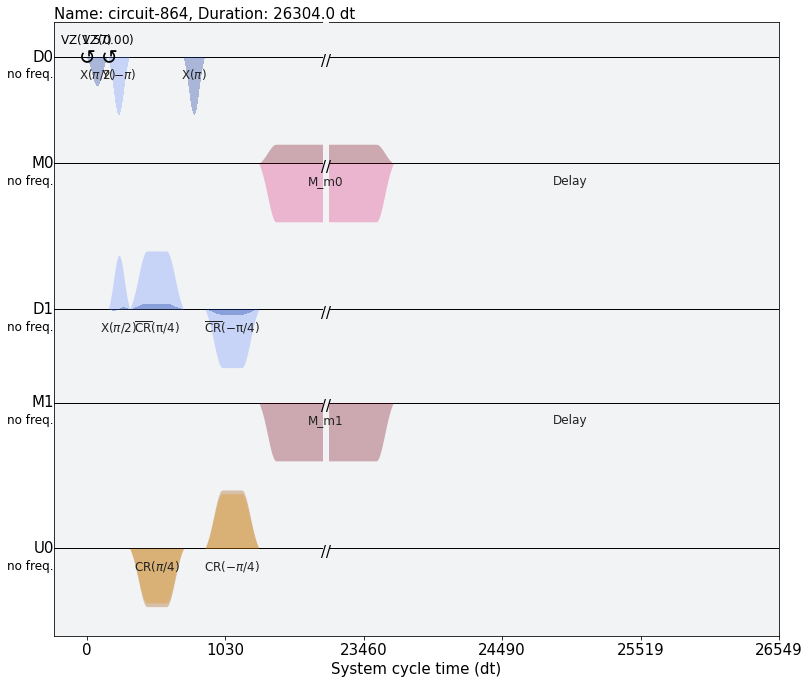

In [9]:
temp_sch2.draw()

In [10]:
backend.configuration().dt

2.2222222222222221e-10

In [11]:
# dt = 2.222e-10 s
# Only measurement: 25024 dt
# H+measurement   : 25184 dt (+160 dt)
# H+CX+measurement: 26304 dt (+1120 dt)

In [12]:
1120*backend.configuration().dt

2.4888888888888886e-07